In [1]:
import numpy as np
import numpy.matlib
import math
import matplotlib
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn import preprocessing
%matplotlib inline

In [2]:
train2 = np.genfromtxt ('letters.csv', delimiter=",")
trainlabels = np.genfromtxt ('letterslabels.csv', delimiter=",")

In [3]:
###########################################

train = train2                          #Copying train dataset so don't need to reload the dataset
[n,m]  = np.shape(train)                    # number of pixels and number of training data n is 7744 m is 70000
# pix = int(math.sqrt(n))
# image = np.reshape(train[:,0],(pix,pix),order="F")
# plt.imshow(image, cmap = 'inferno');

np.random.seed(1000)

In [4]:
[n,m]  = np.shape(train)                    # number of pixels and number of training data n = 88X88 m = 7000 characters
eta    = 0.05                               # learning rate # when change the weight of winning nuerons eta    = 0.05
leaky_update = 0.0001
winit  = 1                                  # parameter controlling magnitude of initial conditions # original = 1
alpha = 0.999
neigbour_update = 0.01

tmax   = 40000 
digits = 16 #number of output neurons

#Normalize the weight vector
W = winit * np.random.rand(digits,n)        # Weight matrix (rows = output neurons, cols = input neurons)
normW = np.sqrt(np.diag(W.dot(W.T)))
normW = normW.reshape(digits,-1)            # reshape normW into a numpy 2d array
#W = W / np.matlib.repmat(normW.T,n,1).T    # normalise using repmat
W = W / normW                               # normalise using numpy broadcasting -  http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

#adding noise level to the initial neurons
# for i in range(digits):
#     for j in range(7744):
#         noise = np.random.normal(5, 6)
#         W[i][j] = W[i][j] + noise


counter = np.zeros((1,digits))              # counter for the winner neurons
wCount = np.ones((1,tmax+1)) * 0.25         # running avg of the weight change over time

#Normalizing the data
normT = np.sqrt(np.diag(train.T.dot(train)))
train = train / np.matlib.repmat(normT.T,n,1)


[n,m] = np.shape(train)


In [5]:
for t in range(1,tmax):
    i = math.ceil(m * np.random.rand())-1   # get a randomly generated index in the input range
    x = train[:,i]                          # pick a training instance using the random index

    h = W.dot(x)/digits                     # get output firing
    h = h.reshape(h.shape[0],-1)            # reshape h into a numpy 2d array

    output = np.max(h)                      # get the max in the output firing vector
    k = np.argmax(h)                        # get the index of the firing neuron

    counter[0,k] += 1                       # increment counter for winner neuron

    dw = eta * (x.T - W[k,:])               # calculate the change in weights for the k-th output neuron
                                            # get closer to the input (x - W)
        
    wCount[0,t] = wCount[0,t-1] * (alpha + dw.dot(dw.T)*(1-alpha)) # % weight change over time (running avg)

    
    W[k,:] = W[k,:] + dw                    # weights for k-th output are updated
    
    
# #     #leaky learning
#     for l in range(digits):
#         if (k != l):
#             dw = eta * (x.T - W[l,:])  * leaky_update
#             W[l,:] += dw
            
# #    #updating neigbour
#     if (k-1>=0):
#         dw = eta * (x.T - W[k-1,:])  * neigbour_update
#         W[k-1,:] += dw
#     if (k+1< digits):
#         dw = eta * (x.T - W[k+1,:])  * neigbour_update
#         W[k+1,:] += dw
    
#     #decaying learning rate
#     eta -= (eta/(tmax))    
    

[0, 1, 4, 5, 10]
There are 5 dead output neurons


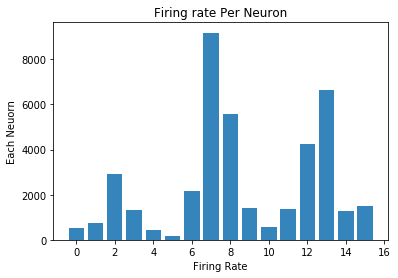

In [6]:
#Printing out the dead units
counter_display = counter.flatten()
yaxis = np.arange(len(counter_display))

#If a output nuerons is fired less than a certian threshold, it is a dead unit.
arr = []
for i in range(digits):
    if (counter_display[i]<(tmax/digits*0.5)):
        arr.append(i)

print(arr)
print("There are "+(str(len(arr)))+" dead output neurons")

#Visualising to histogram
plt.bar(yaxis, counter_display, align='center', alpha=0.9)
plt.xlabel('Firing Rate')
plt.ylabel('Each Neuorn')
plt.title('Firing rate Per Neuron')
plt.show()


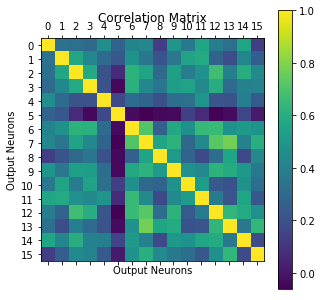

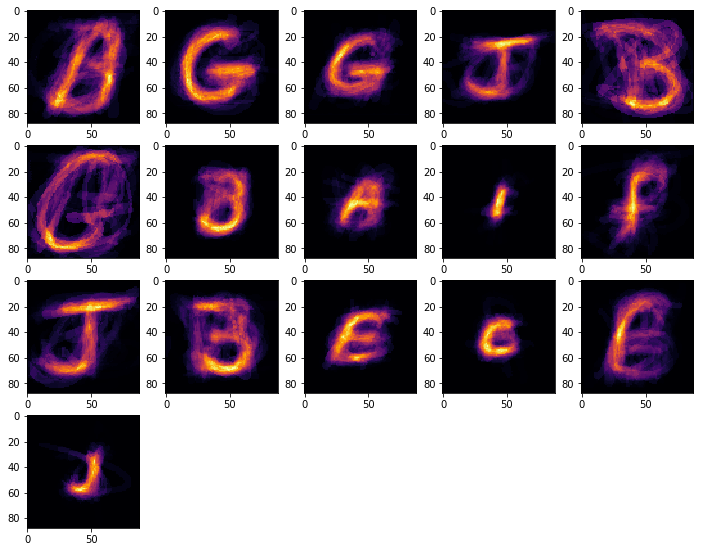

In [7]:
# plt.imshow(W[i,:].reshape((28,28), order = 'F'),interpolation = 'nearest', cmap='inferno')
#Ploting a correlation matrix
correlation_matix = np.corrcoef(W)
plt.figure(figsize=(5,5))
plt.matshow(correlation_matix, fignum=1)
plt.xticks(range(len(correlation_matix[0])))
plt.yticks(range(len(correlation_matix[0])))
plt.xlabel('Output Neurons')
plt.ylabel('Output Neurons')
plt.title('Correlation Matrix')
plt.colorbar()


for i in range(digits):
    for j in range(digits):
        if correlation_matix[i][j]>0.8:
            if (i !=j):
                print(i, j)
        

# Plotting Prototypes
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 5
for i in range(digits):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(W[i,:].reshape((88,88), order = 'F'),interpolation = 'nearest', cmap='inferno')
    # possible different plotting color: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.show()


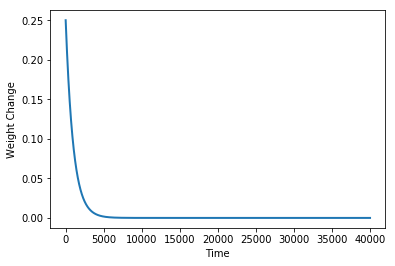

In [8]:
# Plot running average
plt.plot(wCount[0,0:tmax], linewidth=2.0, label='rate')
plt.ylabel("Weight Change")
plt.xlabel("Time")
plt.show()